In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from random import random, randint

In [8]:
u = lambda x: x * 1.5
f = lambda x: x ** 2
g = lambda x: x ** 3
h = lambda x: x ** 4
e = lambda x: np.exp(x)

x_vals = np.linspace(1,9)

## Object Oriented Usage Style

**Explicitly create Figures using the class hierachy**

* Figure: main object
    * Artists: members of Figure
        * Axe: "Koordinatenkreuz" 
            * Axis (2+): "Achsen des Koordinatenkreuz"
        * Labels
        * Legends
        * ...

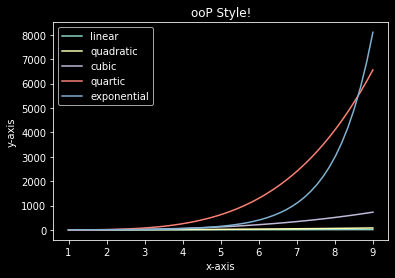

In [9]:
# creates a figure with an attached axe
fig, ax = plt.subplots()  # ooP style still uses plt for instantiaion


# plot pairs of np.array on axe
ax.plot(
    x_vals,     
    u(x_vals),
    label = "linear"
)  

ax.plot(
    x_vals,     
    f(x_vals),
    label = "quadratic"
)  

ax.plot(
    x_vals,     
    g(x_vals),
    label="cubic"
    )

ax.plot(
    x_vals,     
    h(x_vals),
    label="quartic"
    )

ax.plot(
    x_vals,     
    e(x_vals),
    label="exponential"
    )



# set additional properties
ax.set_xlabel("x-axis")  # label x axis (of axe obj)
ax.set_ylabel("y-axis")  #  ...  y ...

ax.set_title("ooP Style!")
ax.legend()

## Pyplot-Usage Style

pyplot module automatically creates and manages figures and axes

* plt acts as a universal interface
* plt works state based instead of object oriented

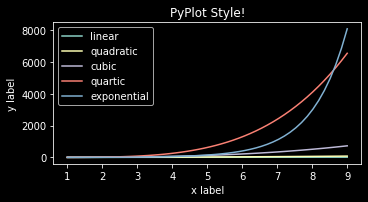

In [10]:
plt.figure(figsize=(5, 2.7), layout="constrained")

# plot on axe
plt.plot(x_vals, u(x_vals), label="linear")
plt.plot(x_vals, f(x_vals), label="quadratic")
plt.plot(x_vals, g(x_vals), label="cubic")
plt.plot(x_vals, h(x_vals), label="quartic")
plt.plot(x_vals, e(x_vals), label="exponential")

# configure artists
plt.xlabel("x label")
plt.ylabel("y label")
plt.title("PyPlot Style!")
plt.legend()


## Multiple Axes in one Figure

suggested Helper Template function using unpacked hash table: 

```python
def template_plotter(ax, data1, data2, param_dict):
    out = ax.plot(data1, data2, **param_dict)
    return out
```

In [11]:
# simple implementation
def my_plotter(ax, data1, data2, plabel=None):
    ax.plot(data1, data2, label=plabel)

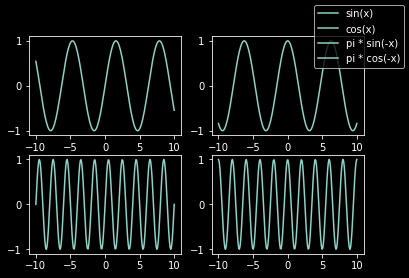

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)

x = np.linspace(-10,10,200)

my_plotter(axes[0,0], x, np.sin(x), "sin(x)")
my_plotter(axes[0,1], x, np.cos(x), "cos(x)")
my_plotter(axes[1,0], x, np.sin(np.pi * x), "pi * sin(-x)")
my_plotter(axes[1,1], x, np.cos(np.pi * x), "pi * cos(-x)")

fig.legend()


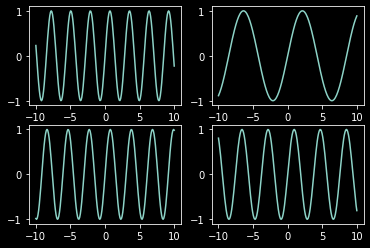

In [13]:
# multiple axes, verbose style
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

x = np.linspace(-10,10,200)

my_plotter(ax1, x, np.sin(random() * np.pi * x))
my_plotter(ax2, x, np.sin(random() * np.e * x))
my_plotter(ax3, x, np.sin(random() * np.pi * x))
my_plotter(ax4, x, np.sin(random() * np.e * x))



In [14]:
def gauss(x, m, s):
    return (
        (s * np.sqrt(2 * np.pi)) * np.exp(
            (-0.5) * (((x - m) ** 2) / s ** 2) 
        )
    )

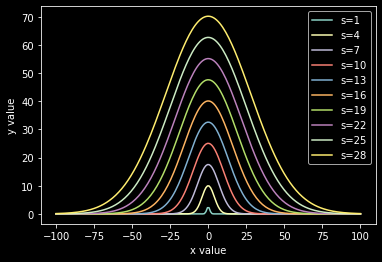

In [19]:
fig, ax = plt.subplots()
ax.set_xlabel("x value")
ax.set_ylabel("y value")

m = 0
x_arr = np.linspace(m-100,m+100, 200)


for stddev in range(1,30,3):
    
    y_arr = gauss(x_arr, m, stddev)
    ax.plot(x_arr, y_arr, label=f"s={stddev}")
    
ax.set_xlabel("x value")
ax.set_ylabel("y value")
ax.legend()

plt.show()


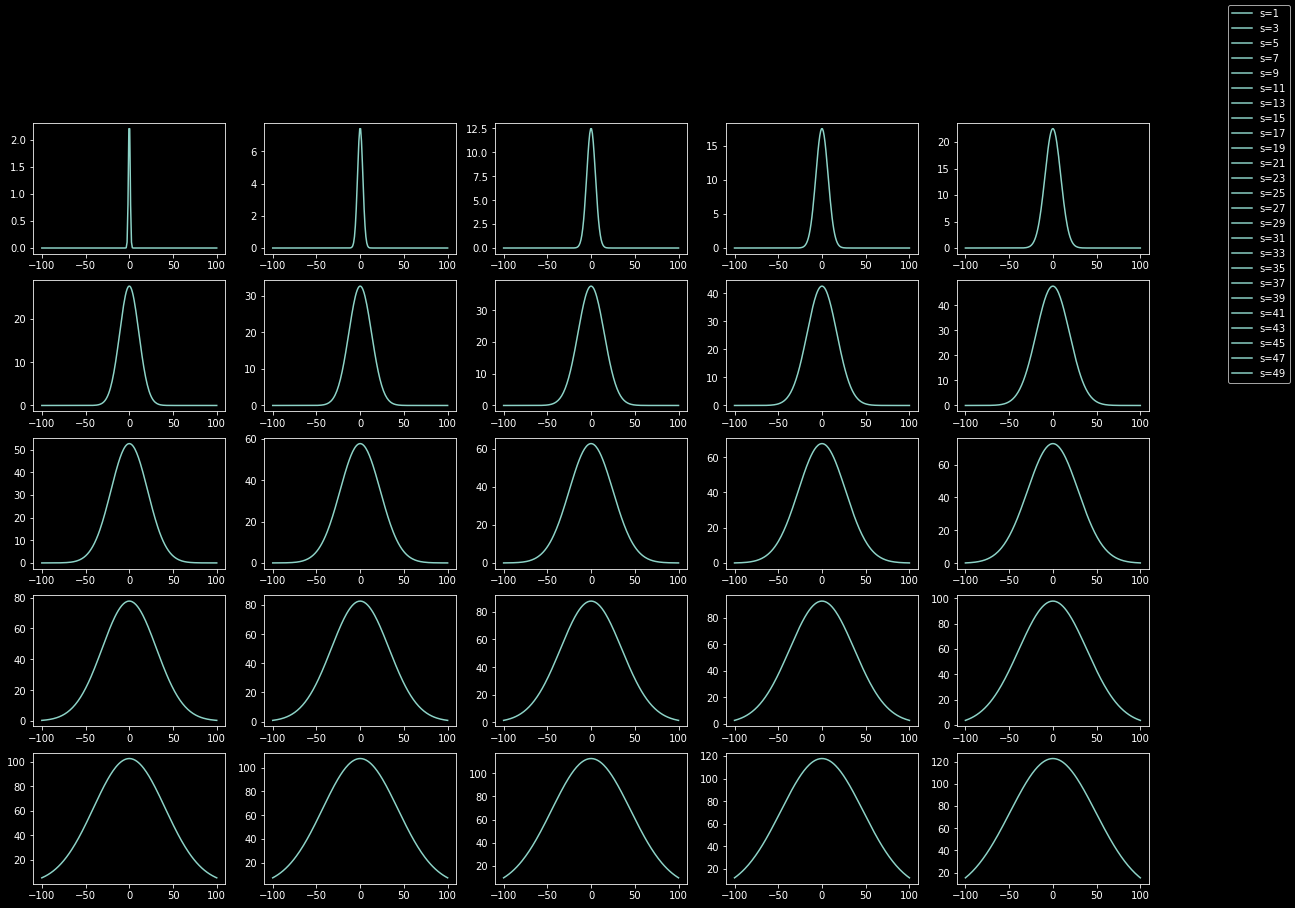

In [16]:
fig, axes = plt.subplots(nrows=5, ncols=5)

x = np.linspace(-100,100,200)
mean = 0
std = 1

for row in axes:
    for ax in row:
        ax.plot(x, gauss(x,mean, std), label=f"s={std}")
        std += 2

fig.set_size_inches(20,14)
fig.legend()

## FuncAnimation - Create Animations from plots (pyplot style)

In [17]:
from matplotlib.animation import FuncAnimation

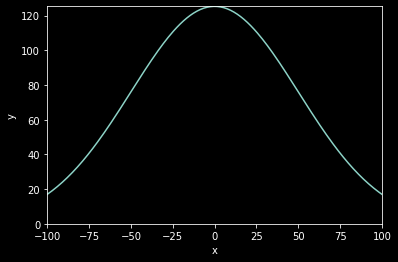

In [24]:
f = gauss
m = 0
s0 = 1
sn = 50

s_vals = np.linspace(s0,sn,sn-s0)       # all std-devs to iterate through 
x_vals = np.linspace(-100, 100)         # x range

max_f = f(m, m, sn)

# set constant axis scale ! (x0, xn, y0, yn)
plt.axis([x_vals[0], x_vals[-1], 0, max_f])
plt.xlabel("x")
plt.ylabel("y")

y = f(x,m,s0)

lines = plt.plot(x,y) #initial plot to create the lines object

def next_frame(s):
    y = f(x, m, s)
    lines[0].set_ydata(y)
    return lines

ani = FuncAnimation(plt.gcf(), next_frame, frames=s_vals, interval=100)
ani.save("movie.mp4",fps=20)    # save animation to movie.mp4
plt.show()


### Basic styling (ooP style)

* fig: figure.Figure  -> canvas like
* ax: axes.Axes       -> plot containing axis, legends, etc.

In [21]:
import numpy as np
import matplotlib.pyplot as plt


data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
        
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

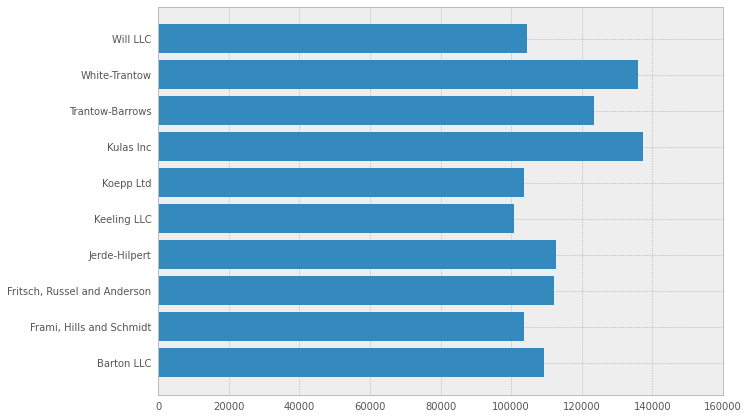

In [50]:
# horizontal barplot using oo interface
fig, ax = plt.subplots()
ax.barh(group_names, group_data)    

# # state based alternative
# plt.figure()
# plt.barh(group_names, group_data)     

# set random style
plt.style.use(plt.style.available[randint(0, len(plt.style.available)-1)])